In [143]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [144]:
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")

In [145]:
# Correct Trophic_ID column name
df_field.rename(columns={"Trophic_ID ": "Trophic_ID"}, inplace=True)
df_field["Trophic_ID"].value_counts().shape

(24,)

In [146]:
pd.set_option('max_rows', 15)
df_field

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0
1,2,A,1,A1,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,3.06,0.44,3.50,1916.67,173.57,18.86,5.0
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0
3,4,A,2,A2,Mesofauna,Acarina,Bdellidae,Predatory mite (attacking arthropods),62,62015,3,2.58,0.92,3.50,2416.67,167.86,17.60,5.0
4,5,A,2,A2,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,2.88,0.36,3.24,2416.67,167.86,17.60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,B,2,B2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.89,8.89,2166.67,165.00,16.75,5.2
584,585,B,3,B3,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.12,9.12,2333.33,145.71,16.89,5.3
585,586,C,1,C1,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.05,9.05,3083.33,234.29,32.52,5.1
586,587,C,2,C2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.98,8.98,3333.33,193.57,32.10,4.9


In [147]:
# Create a pandas df from csv
df_matrix = pd.read_csv("data/Copia di Copia di matrice Marko-3_Martin.csv", header=0, index_col=0, sep=";")
#df.drop(df.columns[-1:], axis=1, inplace=True)
df_matrix

,11 Plant-feeding nematode,31 Bacterivore nematode,45 Substrate-ingesting earthworm,23 Fungivore insect,24 Fungivore enchytraeid,21 Fungivore nematode,81 Omnivore nematode,13 Plant-feeding insect (springtail),44 Substrate-inhabiting enchytraeid,51 Predating nematode (consuming nematodes),...,36 Bacterivore amoebae,37 Bacterivore flagellate,00 Plant autotrophs (roots),"41 Passive lifestage, substrate-related nematode",48 Primary (heterotrophic) producer bacteria,49 Primary (heterotrophic) producer fungi,22 Microphytophage mite (feeding on fungi),62 Predatory mite (attacking arthropods),52 Predatory mite (attacking nematodes),92 Predatory mite (parasitizing mites and nematodes)
CONSUMERS,,,,,,,,,,,,,,,,,,,,,
11 Plant-feeding nematode,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,1
31 Bacterivore nematode,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,1
45 Substrate-ingesting earthworm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
23 Fungivore insect,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
24 Fungivore enchytraeid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49 Primary (heterotrophic) producer fungi,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
22 Microphytophage mite (feeding on fungi),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
62 Predatory mite (attacking arthropods),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [148]:
# Create a graph from df by reading as adjacency matrix
#G = nx.from_pandas_adjacency(df_matrix)
G = nx.from_pandas_adjacency(df_matrix, create_using=nx.DiGraph)
# G = nx.DiGraph.reverse(G_rev)
G.name = "Graph from soil food web adjacency matrix"
print(nx.info(G))

DiGraph named 'Graph from soil food web adjacency matrix' with 24 nodes and 136 edges


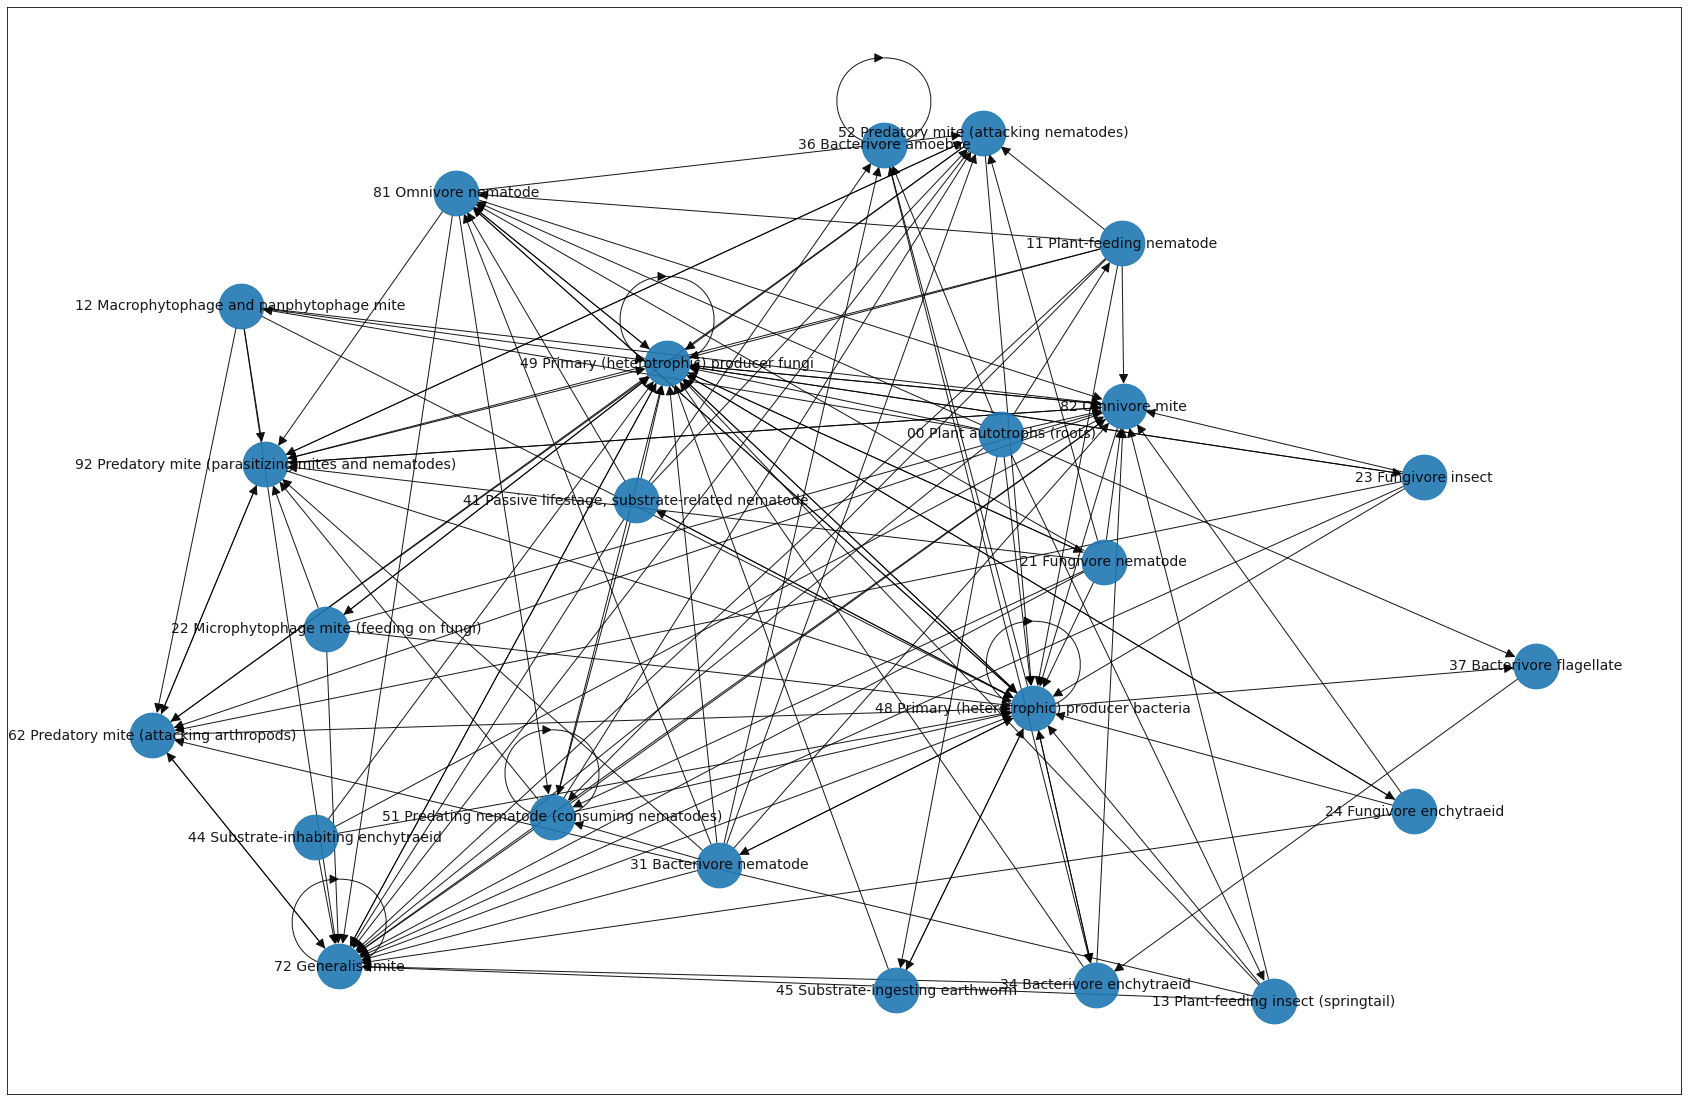

In [149]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=20, node_size=2000, alpha=0.9, font_size=14)
f.savefig("sf_network_2")

In [150]:
print(f"num of nodes: {G.number_of_nodes()}, num of edges: {G.number_of_edges()}, num of avg node degree {G.number_of_edges() / G.number_of_nodes():.2f}")

num of nodes: 24, num of edges: 136, num of avg node degree 5.67


In [151]:
# Get the PageRank
pr = nx.pagerank(G)
# Sort by key value
sorted(pr.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 0.1501403907634017),
 ('49 Primary (heterotrophic) producer fungi', 0.1501403907634017),
 ('72 Generalist mite', 0.11811773408520188),
 ('82 Omnivore mite', 0.06932663908096814),
 ('62 Predatory mite (attacking arthropods)', 0.06284124108611891),
 ('34 Bacterivore enchytraeid', 0.058968624530919125),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.05339136516339751),
 ('36 Bacterivore amoebae', 0.04627901645737003),
 ('81 Omnivore nematode', 0.04207267240112669),
 ('52 Predatory mite (attacking nematodes)', 0.030275248371399555),
 ('37 Bacterivore flagellate', 0.02220081443956587),
 ('51 Predating nematode (consuming nematodes)', 0.02119895807646418),
 ('45 Substrate-ingesting earthworm', 0.020626740365491798),
 ('31 Bacterivore nematode', 0.020429981106232536),
 ('23 Fungivore insect', 0.020429981106232536),
 ('24 Fungivore enchytraeid', 0.020429981106232536),
 ('21 Fungivore nematode', 0.020429981106232536),
 ('41 Passive 

# Prepare dataset for each plot (A,B,C) with avg biomass of OTU agregated on trophic ID level

#### Plot A

In [152]:
# Create df for Plot A
df_field_a = df_field[df_field["Plot_ID"] == "A"].copy()
# Sort by OTU
df_field_a.sort_values("OTU", inplace=True)

# Remove log from biomass 
df_field_a["Biomass"] = 10**(df_field_a["Log10(Biomass)"])

# List of OTUs
OTUs = df_field_a.OTU.unique()
print(f"Number of OTUs in plot A: {len(OTUs)}")

# # Create dictionary for number of times an organism appears (nr. of replicates)
# vc = df_field_a.OTU.value_counts()
# vc = vc.to_dict()

pd.set_option("max_rows", 15)
df_field_a.Biomass = df_field_a.Biomass.round(2)
df_field_a

Number of OTUs in plot A: 96


,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH,Biomass
132,133,A,1,A1,Mesofauna,Enchytraeidae,Achaeta,Fungivore enchytraeid,24,24001,2,3.15,0.44,3.59,1916.67,173.57,18.86,5.0,3890.45
133,134,A,1,A1,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,3.15,0.77,3.92,1916.67,173.57,18.86,5.0,8317.64
147,148,A,3,A3,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,2.85,0.77,3.62,3083.33,171.43,16.19,4.9,4168.69
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0,15488.17
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0,10471.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297,A,1,A1,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,5.28,-0.66,4.62,1916.67,173.57,18.86,5.0,41686.94
329,330,A,2,A2,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,4.65,-0.66,3.99,2416.67,167.86,17.60,5.0,9772.37
368,369,A,3,A3,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,3.94,-0.66,3.28,3083.33,171.43,16.19,4.9,1905.46
18,19,A,3,A3,Mesofauna,Acarina,Tyrophagus,Microphytophage mite (feeding on fungi),22,22140,2,2.88,0.73,3.61,3083.33,171.43,16.19,4.9,4073.80


In [221]:
# Calculate the aggregated biomas per Trophic_ID

# Create dictionary OTU-> Trophic_ID
OTU2trophicID = pd.Series(df_field_a.Trophic_ID.values, df_field_a.OTU.values).to_dict()

# Calcualte avg biomas by OTU group
df_group_a = df_field_a.groupby(["OTU"], as_index=False).Biomass.mean()
df_group_a.Biomass = df_group_a.Biomass.round(2)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_a["OTU"].iteritems():
    df_group_a.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_a = df_group_a.groupby("Trophic_ID", as_index=False).Biomass.sum()
df_group_a

# pd.set_option("max_rows", None)

# Create dictionary for avg biomass feature
avg_biomass_a = pd.Series(df_group_a.Biomass.values, df_group_a.Trophic_ID.values).to_dict()

#Change key "#0" to 00
avg_biomass_a["00"] = avg_biomass_a.pop("#0")

avg_biomass_a

{'11': 479278.83999999997,
 '12': 15889.73,
 '13': 12483.39,
 '21': 17869.440000000002,
 '22': 15405.630000000001,
 '23': 87314.17,
 '24': 666025.6599999999,
 '31': 97189.95999999999,
 '34': 116602.29000000001,
 '36': 430441.34,
 '37': 147631.77,
 '41': 11682.96,
 '44': 213718.45,
 '45': 20876194.67,
 '48': 9439998.08,
 '49': 13499166.6,
 '51': 43024.25,
 '52': 1230.27,
 '62': 3162.28,
 '72': 31643.86,
 '81': 301148.6,
 '82': 18770.75,
 '00': 839114314.65}

In [154]:
# Unify node names and Trophic_ID names
for key_attr in list(avg_biomass_a):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_biomass_a[key_node] = avg_biomass_a.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_biomass_a["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_biomass_a.items(), key=lambda item: item[1]))

{'92 Predatory mite (parasitizing mites and nematodes)': 0,
 '52 Predatory mite (attacking nematodes)': 1230.27,
 '62 Predatory mite (attacking arthropods)': 3162.28,
 '41 Passive lifestage, substrate-related nematode': 11682.96,
 '13 Plant-feeding insect (springtail)': 12483.39,
 '22 Microphytophage mite (feeding on fungi)': 15405.630000000001,
 '12 Macrophytophage and panphytophage mite': 15889.73,
 '21 Fungivore nematode': 17869.440000000002,
 '82 Omnivore mite': 18770.75,
 '72 Generalist mite': 31643.86,
 '51 Predating nematode (consuming nematodes)': 43024.25,
 '23 Fungivore insect': 87314.17,
 '31 Bacterivore nematode': 97189.95999999999,
 '34 Bacterivore enchytraeid': 116602.29000000001,
 '37 Bacterivore flagellate': 147631.77,
 '44 Substrate-inhabiting enchytraeid': 213718.45,
 '81 Omnivore nematode': 301148.6,
 '36 Bacterivore amoebae': 430441.34,
 '11 Plant-feeding nematode': 479278.83999999997,
 '24 Fungivore enchytraeid': 666025.6599999999,
 '48 Primary (heterotrophic) prod

In [155]:
# Add biomas as attribute
nx.set_node_attributes(G, avg_biomass_a, "Biomass")
G.nodes(data=True)

NodeDataView({'11 Plant-feeding nematode': {'Biomass': 479278.83999999997}, '31 Bacterivore nematode': {'Biomass': 97189.95999999999}, '45 Substrate-ingesting earthworm': {'Biomass': 20876194.67}, '23 Fungivore insect': {'Biomass': 87314.17}, '24 Fungivore enchytraeid': {'Biomass': 666025.6599999999}, '21 Fungivore nematode': {'Biomass': 17869.440000000002}, '81 Omnivore nematode': {'Biomass': 301148.6}, '13 Plant-feeding insect (springtail)': {'Biomass': 12483.39}, '44 Substrate-inhabiting enchytraeid': {'Biomass': 213718.45}, '51 Predating nematode (consuming nematodes)': {'Biomass': 43024.25}, '72 Generalist mite': {'Biomass': 31643.86}, '34 Bacterivore enchytraeid': {'Biomass': 116602.29000000001}, '82 Omnivore mite': {'Biomass': 18770.75}, '12 Macrophytophage and panphytophage mite': {'Biomass': 15889.73}, '36 Bacterivore amoebae': {'Biomass': 430441.34}, '37 Bacterivore flagellate': {'Biomass': 147631.77}, '00 Plant autotrophs (roots)': {'Biomass': 839114314.65}, '41 Passive life

'92 Predatory mite (parasitizing mites and nematodes)' was not detected in Plot A and C and has no biomass feature.

# Visaulise Graph A with Biomass

In [156]:
# Prepare biomass feature values
biomass_array = np.array(list(avg_biomass_a.values()))
biomass_array

array([4.79278840e+05, 1.58897300e+04, 1.24833900e+04, 1.78694400e+04,
       1.54056300e+04, 8.73141700e+04, 6.66025660e+05, 9.71899600e+04,
       1.16602290e+05, 4.30441340e+05, 1.47631770e+05, 1.16829600e+04,
       2.13718450e+05, 2.08761947e+07, 9.43999808e+06, 1.34991666e+07,
       4.30242500e+04, 1.23027000e+03, 3.16228000e+03, 3.16438600e+04,
       3.01148600e+05, 1.87707500e+04, 8.39114315e+08, 0.00000000e+00])

In [225]:
array_log = 100*np.log2(biomass_array)
# np.interp(array, (array.min(), array.max()), (0, 5))
list_log = list(array_log)
list_log.sort()
print(list_log)

[-inf, 1026.4759254628439, 1162.6749399583894, 1351.2118221944004, 1360.7722146446906, 1391.1170060906993, 1395.5806990014958, 1412.520680285543, 1419.6198674878806, 1494.963797377215, 1539.2862422931453, 1641.3928183803005, 1656.8519666566328, 1683.1236596930637, 1717.164369373056, 1770.5351933555437, 1820.0116026474927, 1871.5457116803718, 1887.0505721297625, 1934.5218235579616, 2317.035513548176, 2368.6367006364612, 2431.5355424440977, 2964.429212512077]


/var/folders/4p/mr19cxrs6_z3dsfws0cjcwfw0000gn/T/ipykernel_16138/11232855.py:1: RuntimeWarning: divide by zero encountered in log2
  array_log = 100*np.log2(biomass_array)


In [158]:
# np. linspace
# Rescale Biomass feature by standardisation

OldMax = np.amax(biomass_array)
OldMin = np.amin(biomass_array)
NewMax = 100000
NewMin = 1000

OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

array_stand = []
for OldValue in biomass_array:
    array_stand.append((((OldValue - OldMin) * NewRange) / OldRange) + NewMin)
array_stand = np.array(array_stand)

list_stand = list(array_stand)
list_stand.sort()
print(list_stand)

[1000.0, 1000.1451491505669, 1000.3730906677841, 1001.378373625389, 1001.4728095903304, 1001.8175799689893, 1001.8746948330349, 1002.1082640697625, 1002.2146020125698, 1003.7333913690969, 1005.076067319596, 1010.3014603363137, 1011.4666212600763, 1013.7569178697838, 1017.4178237396609, 1025.214832092127, 1035.5299759275772, 1050.7841326455912, 1056.5460561589766, 1078.578733777772, 2113.7455214428214, 2592.652479009881, 3463.0056194334525, 100000.0]


NetworkXError: Node '11' has no position.

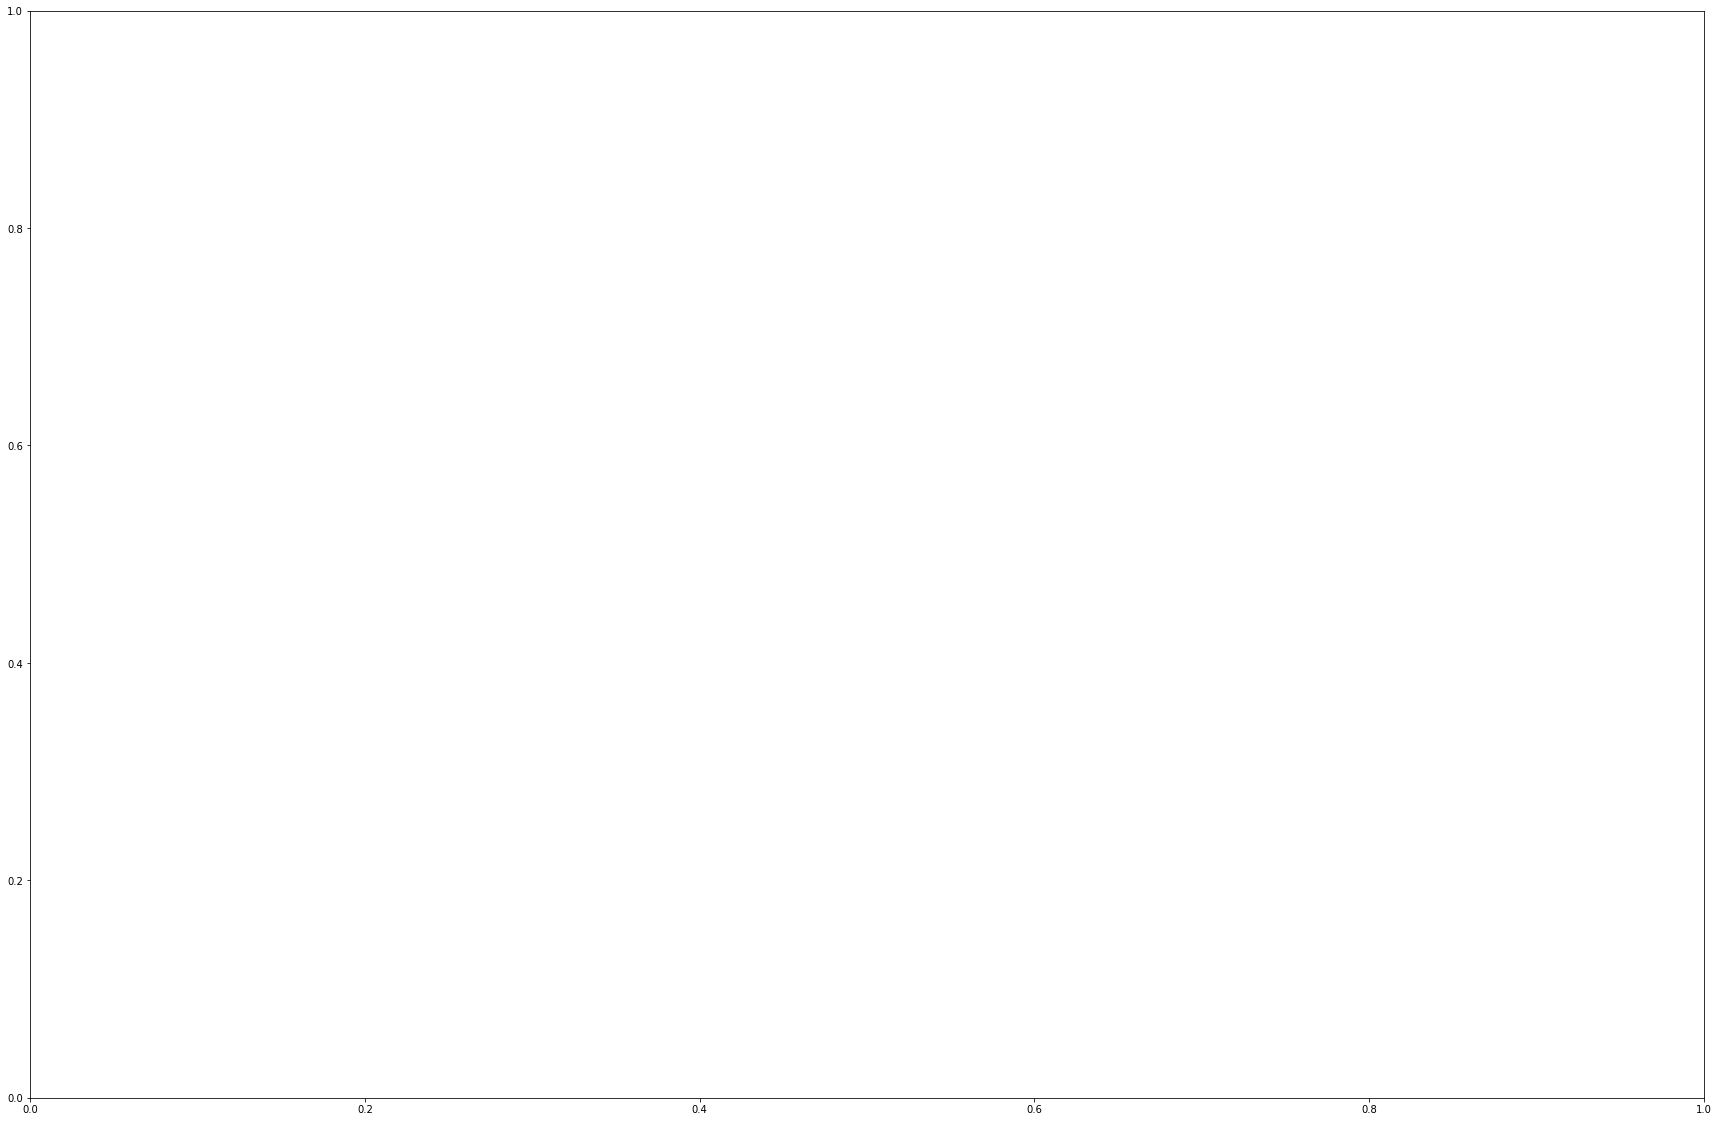

In [226]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, nodelist=list(avg_biomass_a.keys()), node_size=array_log, alpha=0.9, font_size=14)
f.savefig("sf_network_5_log")

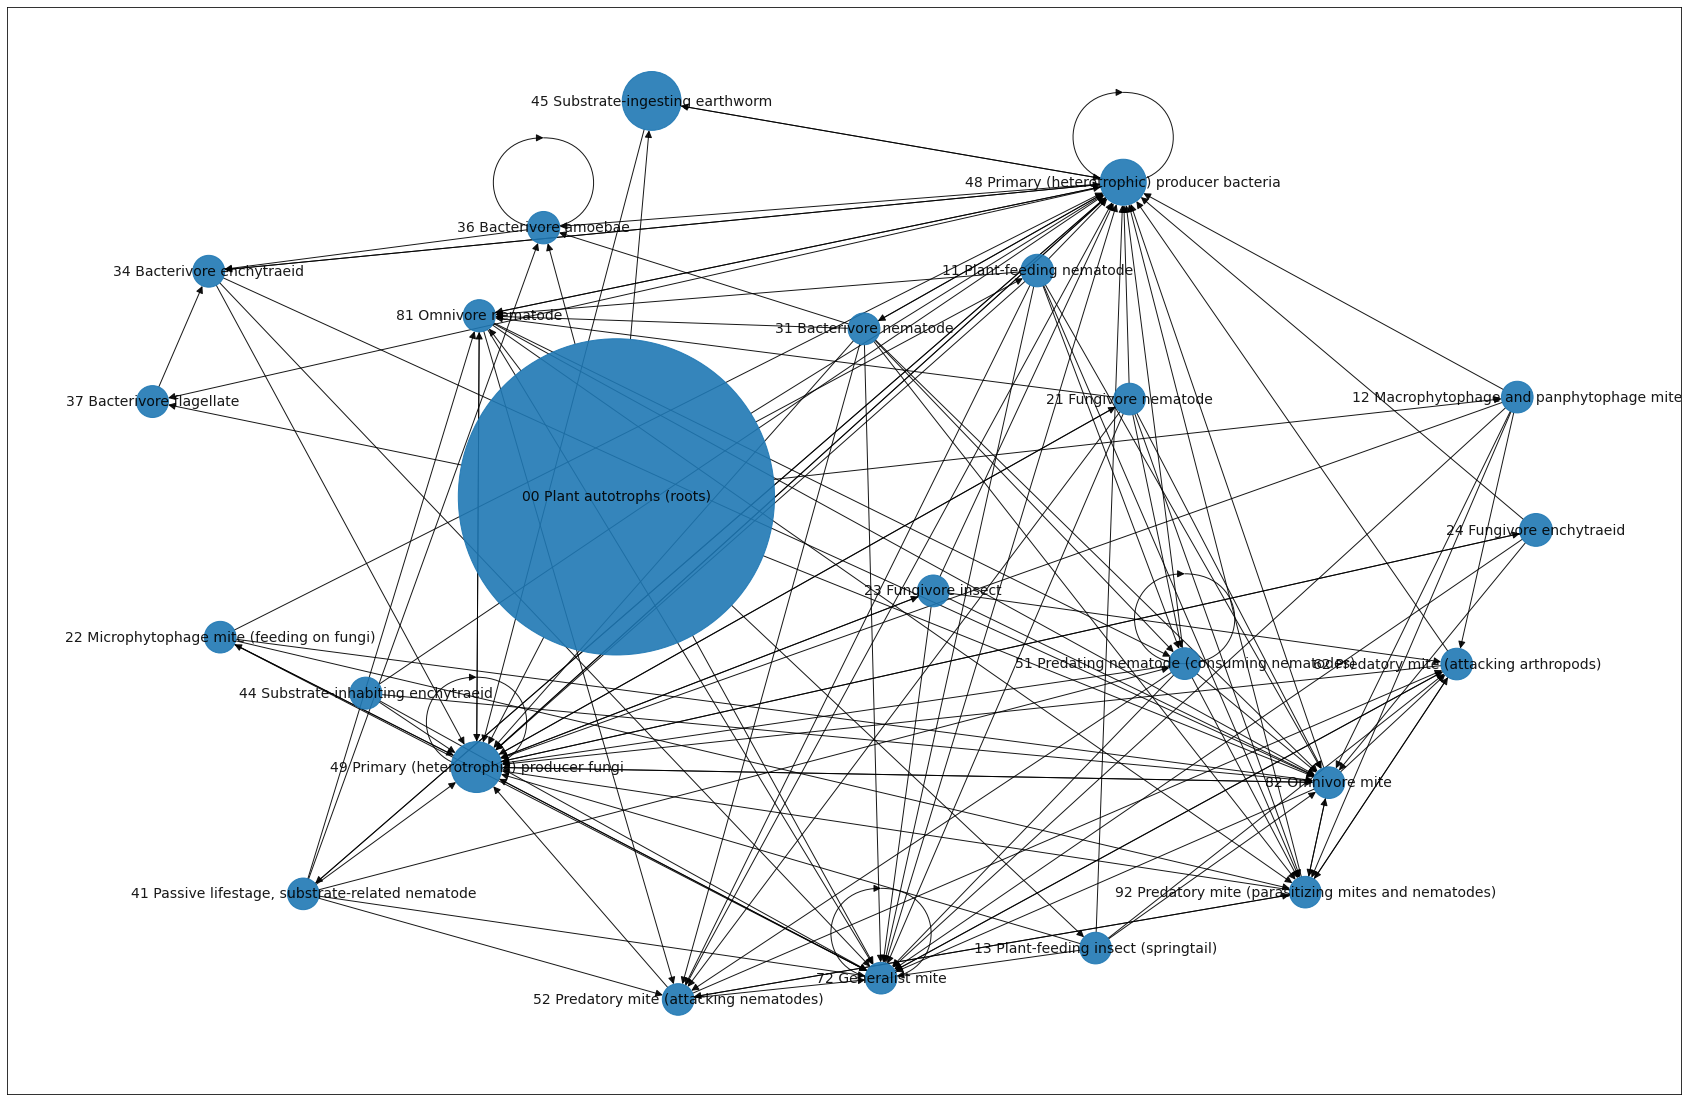

In [172]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, nodelist=list(avg_biomass_a.keys()), node_size=array_stand, alpha=0.9, font_size=14)
f.savefig("sf_network_3")

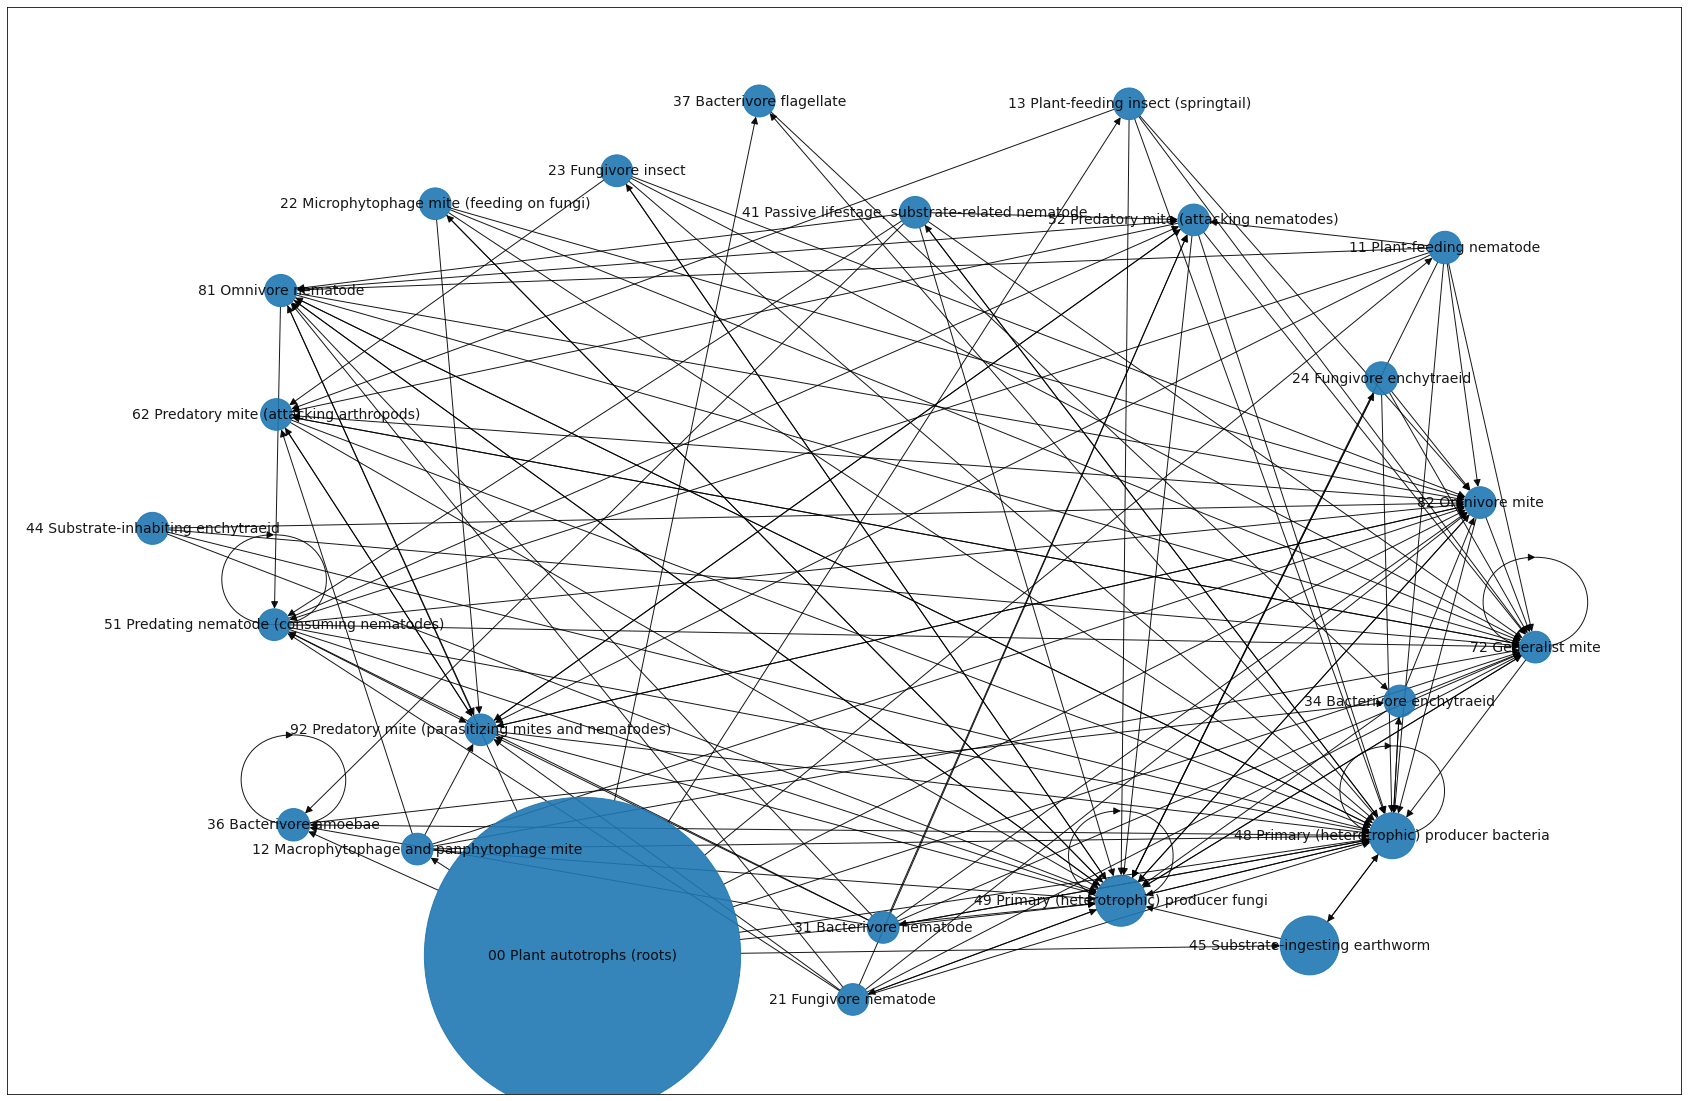

In [217]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=3, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, nodelist=list(avg_biomass_a.keys()), node_size=array_stand, alpha=0.9, font_size=14)
f.savefig("sf_network_4")

In [173]:
# Marko: Zmanjšaj največjega
## Vid:  raje umatknil an rob; treba odstranit manjkajočega; nx.pagerank bojda lahko upošteva edge weight


In [161]:
# Nariši z graphviz ali gephi

In [162]:
# ali je biomasa nad 10% biomase s katerimi se prehranjujeo (verjetno edge attribute)

In [163]:
# page rank: uproabit random walk ki upoštevan atribute na povezavah (uteži)

In [164]:
# ?Flow network: Metric: max and min flow; simulate flow using link weights; Check if usable for simulation
# try personalised pagerank (random walk pogojen s utežmi na povezavi)